<a href="https://colab.research.google.com/github/AnovaYoung/SchoolProjects/blob/main/CNN_LeafClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_file_path = '/Users/anovayoungers/Downloads/M4-archive.zip'

# list contents of the zip file
def list_zip_contents(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_contents = zip_ref.namelist()
        for file_name in zip_contents:
            print(file_name)


list_zip_contents(zip_file_path)



Leaves/1001.jpg
Leaves/1002.jpg
Leaves/1003.jpg
Leaves/1004.jpg
Leaves/1005.jpg
Leaves/1006.jpg
Leaves/1007.jpg
Leaves/1008.jpg
Leaves/1009.jpg
Leaves/1010.jpg
Leaves/1011.jpg
Leaves/1012.jpg
Leaves/1013.jpg
Leaves/1014.jpg
Leaves/1015.jpg
Leaves/1016.jpg
Leaves/1017.jpg
Leaves/1018.jpg
Leaves/1019.jpg
Leaves/1020.jpg
Leaves/1021.jpg
Leaves/1022.jpg
Leaves/1023.jpg
Leaves/1024.jpg
Leaves/1025.jpg
Leaves/1026.jpg
Leaves/1027.jpg
Leaves/1028.jpg
Leaves/1029.jpg
Leaves/1030.jpg
Leaves/1031.jpg
Leaves/1032.jpg
Leaves/1033.jpg
Leaves/1034.jpg
Leaves/1035.jpg
Leaves/1036.jpg
Leaves/1037.jpg
Leaves/1038.jpg
Leaves/1039.jpg
Leaves/1040.jpg
Leaves/1041.jpg
Leaves/1042.jpg
Leaves/1043.jpg
Leaves/1044.jpg
Leaves/1045.jpg
Leaves/1046.jpg
Leaves/1047.jpg
Leaves/1048.jpg
Leaves/1049.jpg
Leaves/1050.jpg
Leaves/1051.jpg
Leaves/1052.jpg
Leaves/1053.jpg
Leaves/1054.jpg
Leaves/1055.jpg
Leaves/1056.jpg
Leaves/1057.jpg
Leaves/1058.jpg
Leaves/1059.jpg
Leaves/1060.jpg
Leaves/1061.jpg
Leaves/1062.jpg
Leaves/1

Im going to investigate that .csv file.

In [ ]:
import zipfile
import pandas as pd

# Function to read a CSV file from a zip file
def read_csv_from_zip(zip_file_path, csv_file_name):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        with zip_ref.open(csv_file_name) as file:
            df = pd.read_csv(file)
    return df

csv_file_name = 'Leaves/all.csv'
df_labels = read_csv_from_zip(zip_file_path, csv_file_name)
print(df_labels.head())

print(df_labels.info())

   Unnamed: 0        id   y
0           0  1300.jpg   5
1           1  3152.jpg  23
2           2  1439.jpg   9
3           3  1243.jpg   4
4           4  1186.jpg   3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1907 non-null   int64 
 1   id          1907 non-null   object
 2   y           1907 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 44.8+ KB
None


In [ ]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Create directories to store extracted images
extracted_path = '/tmp/extracted_leaves'
os.makedirs(extracted_path, exist_ok=True)

# Function to extract and preprocess images
def extract_and_preprocess_images(zip_file_path, csv_file_name, extracted_path, img_size=(128, 128)):

    df_labels = read_csv_from_zip(zip_file_path, csv_file_name)

    # Lists to hold the images and labels
    images = []
    labels = []

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for index, row in tqdm(df_labels.iterrows(), total=df_labels.shape[0]):
            img_name = row['id']
            label = row['y']

            with zip_ref.open(f'Leaves/{img_name}') as img_file:

                img = np.frombuffer(img_file.read(), np.uint8)
                img = cv2.imdecode(img, cv2.IMREAD_GRAYSCALE)

                img = cv2.resize(img, img_size)

                images.append(img)
                labels.append(label)

In [ ]:

def preprocess_images(zip_file_path, csv_file_name, extracted_path, img_size=(128, 128)):

    df_labels = read_csv_from_zip(zip_file_path, csv_file_name)

    images = []
    labels = []

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for index, row in tqdm(df_labels.iterrows(), total=df_labels.shape[0]):
            img_name = row['id']
            label = row['y']

            # Extracting file
            with zip_ref.open(f'Leaves/{img_name}') as img_file:

                # Read image as a numpy array
                img = np.frombuffer(img_file.read(), np.uint8)
                img = cv2.imdecode(img, cv2.IMREAD_GRAYSCALE)

                # Now Resize
                img = cv2.resize(img, img_size)

                # Append the image and label to the lists
                images.append(img)
                labels.append(label)

    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Normalizing images
    images = images / 255.0

    return images, labels

# Preprocessing bogh images and labels
images, labels = preprocess_images(zip_file_path, csv_file_name, extracted_path)

print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

  0%|          | 0/1907 [00:00<?, ?it/s]

100%|██████████| 1907/1907 [00:14<00:00, 134.57it/s]

Images shape: (1907, 128, 128)
Labels shape: (1907,)


In [ ]:
# Split into training, val, and test sets
def split_data(images, labels, test_size=0.2, val_size=0.1):

    # First split into train+val and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(images, labels, test_size=test_size, random_state=42)

    # Then split the train+val set into train and val sets
    val_relative_size = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_relative_size, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

# split
X_train, X_val, X_test, y_train, y_val, y_test = split_data(images, labels)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (1334, 128, 128)
Validation set shape: (191, 128, 128)
Test set shape: (382, 128, 128)


Now that preprocessing and splitting steps are done, I'm going to **Build the CNN**.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile = optimizer + loss function
    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

# input shape and number of classes
input_shape = (128, 128, 1)
num_classes = len(np.unique(labels))

# Create the CNN model based on above architecture
cnn_model = create_cnn_model(input_shape, num_classes)


cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

Now that I have architecture set up, I can proceed to **Model Training**.

Epoch 1/20
42/42 [==============================] - 4s 88ms/step - loss: 3.3610 - accuracy: 0.0712 - val_loss: 3.0001 - val_accuracy: 0.2513
Epoch 2/20
42/42 [==============================] - 4s 88ms/step - loss: 2.3757 - accuracy: 0.3313 - val_loss: 1.7406 - val_accuracy: 0.5602
Epoch 3/20
42/42 [==============================] - 4s 87ms/step - loss: 1.6530 - accuracy: 0.5247 - val_loss: 1.0024 - val_accuracy: 0.7644
Epoch 4/20
42/42 [==============================] - 4s 90ms/step - loss: 1.1947 - accuracy: 0.6454 - val_loss: 0.8084 - val_accuracy: 0.7958
Epoch 5/20
42/42 [==============================] - 4s 90ms/step - loss: 0.9931 - accuracy: 0.7046 - val_loss: 0.7550 - val_accuracy: 0.8115
Epoch 6/20
42/42 [==============================] - 4s 89ms/step - loss: 0.7925 - accuracy: 0.7601 - val_loss: 0.5657 - val_accuracy: 0.8220
Epoch 7/20
42/42 [==============================] - 4s 89ms/step - loss: 0.6434 - accuracy: 0.7879 - val_loss: 0.5568 - val_accuracy: 0.8482
Epoch 8/20
42

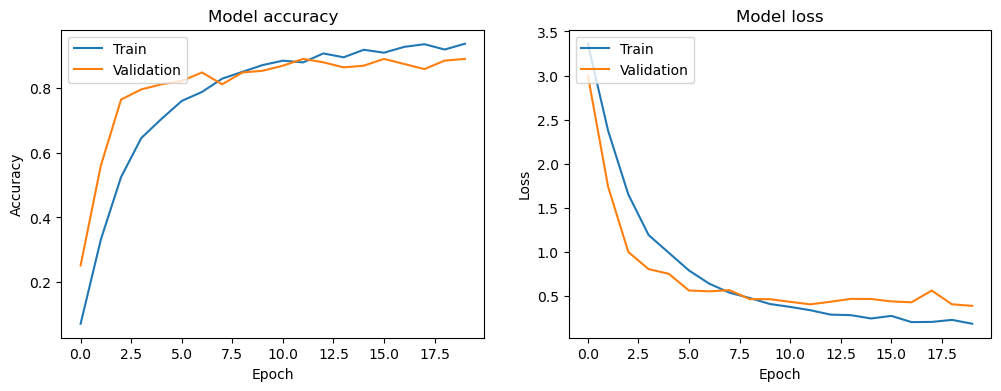

In [ ]:
# Reshape the data to add the channel dimension
X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
X_val = X_val.reshape(X_val.shape[0], 128, 128, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)

# Train the CNN model
def train_cnn_model(model, X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val))
    return history

# Train the model
history = train_cnn_model(cnn_model, X_train, y_train, X_val, y_val)

# Plot training history
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_training_history(history)


The training results of my CNN model indicate a strong learning performance. Initially, both the training and validation accuracy improve rapidly, with the training accuracy reaching approximately 93.7% and the validation accuracy reaching 89.0% by the end of 20 epochs. This tells me the model is distinguishing between different plant species well and learning quickly. The training loss consistently decreases from an initial value of 3.36 to 0.19, while the validation loss decreases from 3.00 to 0.39, indicating a swift reduction in prediction errors on both training and validation data. The relatively close alignment between training and validation curves for both accuracy and loss suggests minimal overfitting, which is promising for the model's generalization capability. These results show the model is robust and has learned to generalize well from the training data to unseen validation data.

Now we are going to validate the model on the test set. Typically I validate on the validation data but I wanted to try it this way given the difference in size between the test and val sets. I thought it would be interesting.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate on test set
def evaluate_model(model, X_test, y_test):
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    return test_loss, test_accuracy, accuracy, precision, recall, f1, conf_matrix

test_loss, test_accuracy, accuracy, precision, recall, f1, conf_matrix = evaluate_model(cnn_model, X_test, y_test)

# Print metrics
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


12/12 [==============================] - 0s 24ms/step
Test Loss: 0.46832624077796936
Test Accuracy: 0.8900523781776428
Accuracy: 0.8900523560209425
Precision: 0.9010163573722243
Recall: 0.8900523560209425
F1 Score: 0.8865001984267903
Confusion Matrix:
[[ 8  0  1 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ... 13  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0 11]]


The evaluation of our CNN model on the test set shows promising results, reflecting its strong performance and generalization capabilities. The test loss is 0.47, indicating a low error rate on unseen data. The test accuracy is approximately 89.0%, which is consistent with the validation accuracy observed during training, further confirming the model's ability to generalize well.

The confusion matrix provides a detailed breakdown of the model's predictions versus the true labels. Each row of the matrix represents the true class, while the columns represent the predicted class. High values along the diagonal indicate correct predictions. The model correctly classified 14 instances of one class and 13 of another, with some misclassifications scattered across different classes.

I'm going to visualize the confusion matrix for better interpretability.

12/12 [==============================] - 0s 25ms/step


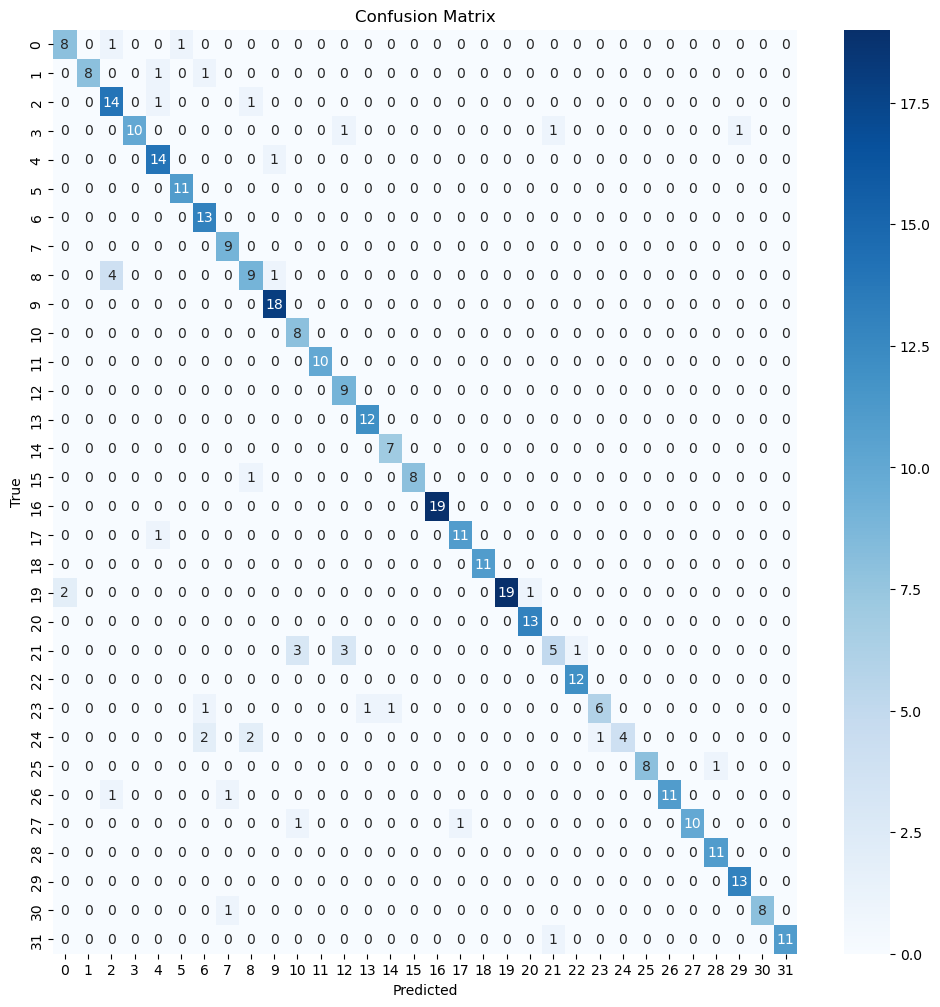

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# predictions for test set
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot confusion matrix
class_names = [str(i) for i in range(num_classes)]
plot_confusion_matrix(y_test, y_pred_classes, class_names)


The feature map visualization I'm about to code, is designed to help you see what features the convolutional layers of my CNN model are detecting at different stages of processing an image

1/1 [==============================] - 0s 21ms/step


/var/folders/3y/w5ts8qfs3sl47n2k1dprbgs00000gn/T/ipykernel_58972/3296880340.py:17: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


<Figure size 1500x1500 with 0 Axes>

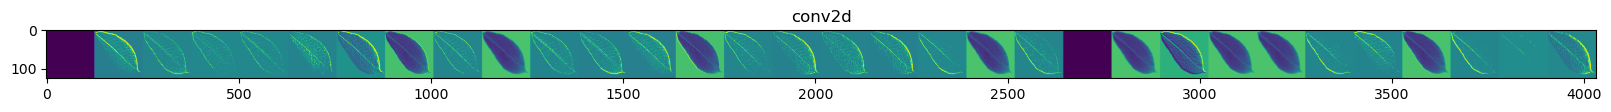

1/1 [==============================] - 0s 29ms/step


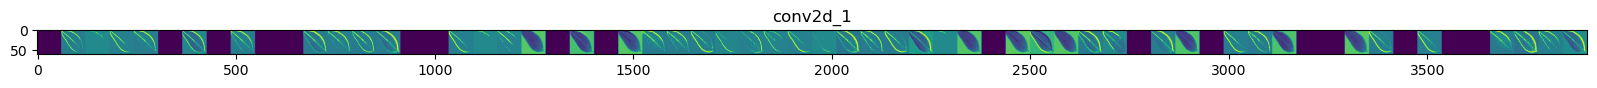

1/1 [==============================] - 0s 24ms/step


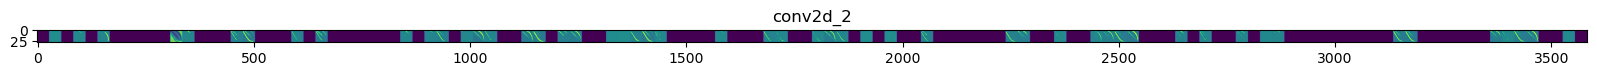

In [ ]:
# Function to plot feature maps
def plot_feature_maps(model, layer_names, img):
    plt.figure(figsize=(15, 15))
    for layer_name in layer_names:
        intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
        outputs=model.get_layer(layer_name).output)
        intermediate_output = intermediate_layer_model.predict(img)

        num_filters = intermediate_output.shape[-1]
        size = intermediate_output.shape[1]

        display_grid = np.zeros((size, size * num_filters))

        for i in range(num_filters):
            x = intermediate_output[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x

        scale = 20. / num_filters
        plt.figure(figsize=(scale * num_filters, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()

# Select a test image
test_img = X_test[0].reshape(1, 128, 128, 1)

# Specify the names of the convolutional layers
conv_layer_names = ['conv2d', 'conv2d_1', 'conv2d_2']

# Plot the feature maps for the selected test image
plot_feature_maps(cnn_model, conv_layer_names, test_img)


I'm going to plot the misclassified image to better understand where we can improve.

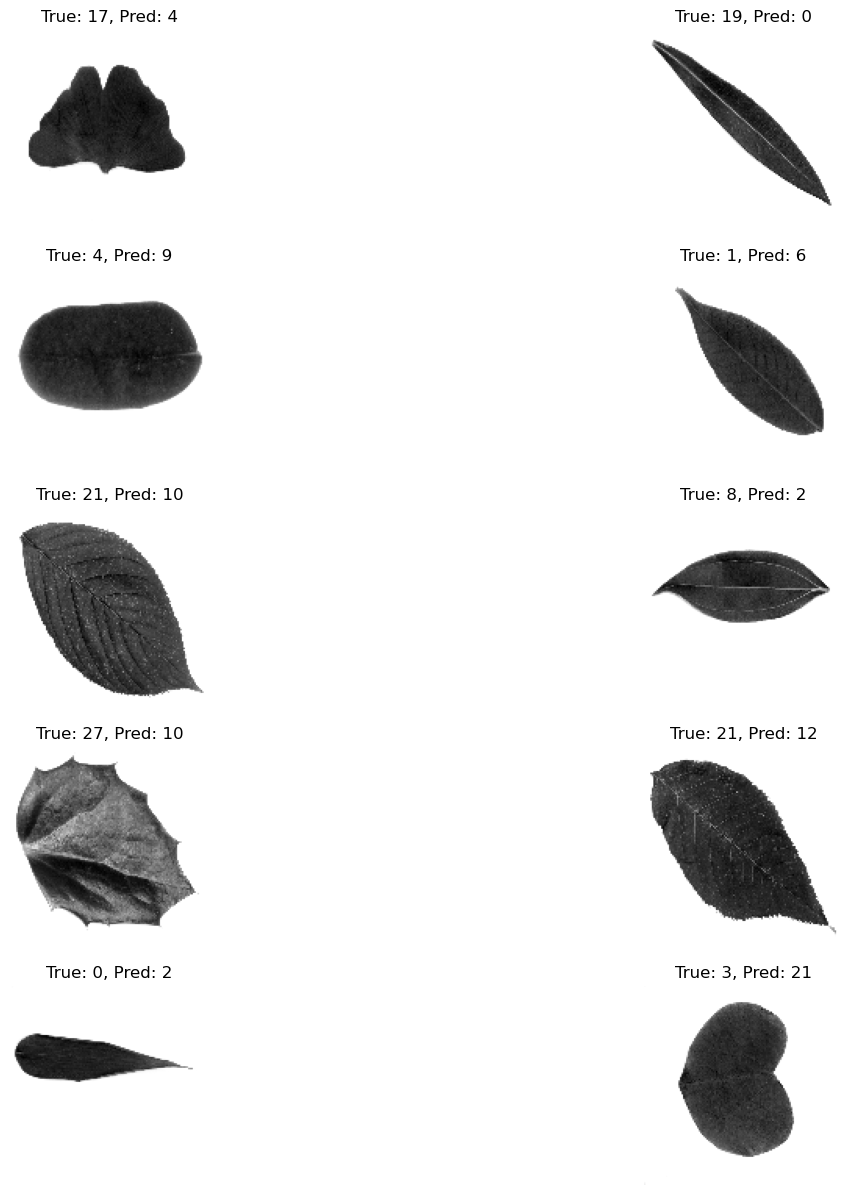

In [ ]:
# plot misclassified images
def plot_misclassified_images(X_test, y_test, y_pred_classes, class_names):
    misclassified_indices = np.where(y_test != y_pred_classes)[0]
    num_images_to_show = min(len(misclassified_indices), 10)

    plt.figure(figsize=(15, 15))
    for i in range(num_images_to_show):
        index = misclassified_indices[i]
        plt.subplot(5, 2, i + 1)
        plt.imshow(X_test[index].reshape(128, 128), cmap='gray')
        plt.title(f"True: {class_names[y_test[index]]}, Pred: {class_names[y_pred_classes[index]]}")
        plt.axis('off')
    plt.show()


plot_misclassified_images(X_test, y_test, y_pred_classes, class_names)


Several misclassifications occur between leaves with similar shapes and edges. For example, the model confused a leaf of class 19 with class 0, and class 8 with class 2. This suggests that the model might be focusing heavily on shape and edges without enough emphasis on the finer leaf details. Also, some misclassifications could be due to the model not capturing the vein patterns or textures adequately. An example of that is the leaf of class 21 is mistaken for class 12, suggesting that more attention might be needed on fine-grained features.

I believe Data Augmentation would be a strong area for improvement. Increase the variability in the training set through techniques like rotations, flips, scaling, and translations. This can help the model generalize better to different orientations and sizes of leaves.
Also, using architecture like ResNet or Inception could potentially capture more complex patterns and features.